In [18]:
import pandas as pd
import numpy as np

from pprint import pprint
# pretty print

import nltk
# Natural Language Toolkit from google

# if this is first time you use nltk, please open terminal and type codes bellow
# python
#   >>> import nltk
#   >>> nltk.download('stopwords')
#   >>> nltk.download('punkt')
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
import string
puns = string.punctuation

In [19]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
puns

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Word2Vec
1. 簡介
    
    Word2Vec其實是Word to Vector的簡稱，意在將每一個字轉換成一條向量，並讓這字的語意透過這條向量描繪出來。早期做自然語言處理時，很難對讓電腦對詞背後的意思有更深一層的理解，因此詞與詞之間的關係很難被挖掘出來，像是相似詞、相反詞、對應詞等，因此Word2Vec在這樣的背景下產生就顯得極其珍貴。
    
    
2. 作用&賣點
    1. 它可以找到相似的字。
    2. 它可以加減，像是Taiwan-Taipei=Germany-Berlin。
    
3. 訓練方法: 參照[這篇網誌](https://goatwang.github.io/2017/06/06/Train-Wiki-Corpus-by-gensim-Word2vec/)

4. 已經訓練好的model:
    1. [Various Models](https://code.google.com/archive/p/word2vec/)
    2. 本課程使用之[GloVe Word2Vec](https://nlp.stanford.edu/projects/glove/)(時間考量已經壓縮過，只留下這個文件中會用到的字)，Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip

5. 專案: 將e-commerce商品標籤分群

# Load Data

In [21]:
with open('all_categories.list', 'r', encoding='utf8') as f:
    all_categories = np.array(eval(f.read()))
print("商品標籤個數:", len(all_categories))
print("前10個商品標籤:", all_categories[:10])


商品標籤個數: 910
前10個商品標籤: ['Small Animal' 'Kitchen' 'Fragrance' 'Track & Sweat Suits' 'Wallet'
 'Favors' 'Quilts' 'Sticker' 'Pets' 'Skirt']


In [22]:
# (前一百項)每一單字和其向量
path = "glove.twitter.27B.50d.txt"
with open(path,'r',encoding='utf-8') as f:
    for i in range(100):
        print(f.readline())


protection -0.26041001081466675 0.009347000159323215 -1.277899980545044 0.9399700164794922 0.13463999330997467 0.28652000427246094 0.4756700098514557 -0.5184699892997742 0.6833699941635132 -0.6862099766731262 0.25913000106811523 0.29725000262260437 -2.7242000102996826 0.3847300112247467 1.25600004196167 0.9254199862480164 -0.10192999988794327 0.1596599966287613 0.0022934998851269484 -0.3875899910926819 -1.0683000087738037 -0.5366100072860718 0.006115600001066923 0.15376000106334686 0.3549000024795532 0.5984600186347961 0.08532900363206863 0.8782899975776672 0.21870000660419464 1.0113999843597412 -0.006921399850398302 -0.51214998960495 -0.27296000719070435 -0.8319799900054932 0.8566399812698364 -0.5214400291442871 -0.46560999751091003 0.9842900037765503 -0.6712200045585632 -0.9612900018692017 0.7888100147247314 -0.6132299900054932 0.2655099928379059 -0.394569993019104 0.5829100012779236 -0.5644299983978271 0.305649995803833 0.04157700017094612 0.8367699980735779 -0.45295000076293945

he

In [23]:
# 切 word(key) 和 vector(token)
path = "glove.twitter.27B.50d.txt"

word2vec_dict={}
with open(path,'r',encoding='utf-8') as f:
    for i in range(100):
        line = f.readline()
        tokens = line.split()
        word = tokens[0]
        vector = tokens[1:]
        word2vec_dict[word]=vector
word2vec_dict
    
    # vector 為 str

{'protection': ['-0.26041001081466675',
  '0.009347000159323215',
  '-1.277899980545044',
  '0.9399700164794922',
  '0.13463999330997467',
  '0.28652000427246094',
  '0.4756700098514557',
  '-0.5184699892997742',
  '0.6833699941635132',
  '-0.6862099766731262',
  '0.25913000106811523',
  '0.29725000262260437',
  '-2.7242000102996826',
  '0.3847300112247467',
  '1.25600004196167',
  '0.9254199862480164',
  '-0.10192999988794327',
  '0.1596599966287613',
  '0.0022934998851269484',
  '-0.3875899910926819',
  '-1.0683000087738037',
  '-0.5366100072860718',
  '0.006115600001066923',
  '0.15376000106334686',
  '0.3549000024795532',
  '0.5984600186347961',
  '0.08532900363206863',
  '0.8782899975776672',
  '0.21870000660419464',
  '1.0113999843597412',
  '-0.006921399850398302',
  '-0.51214998960495',
  '-0.27296000719070435',
  '-0.8319799900054932',
  '0.8566399812698364',
  '-0.5214400291442871',
  '-0.46560999751091003',
  '0.9842900037765503',
  '-0.6712200045585632',
  '-0.9612900018692

In [24]:
word_vec_mapping = {}
path = "glove.twitter.27B.50d.txt"

# 打開上述檔案，並將每一行中的第一個詞作為key，後面的數字做為向量，加入到word_vec_mapping
with open(path, 'r', encoding='utf8') as f:  ## 這個文檔的格式是一行一個字並配上他的向量，以空白鍵分隔
    for line in f:  
        #=============your works starts===============#
        tokens = line.split()
        word = tokens[0] 
        vector = tokens[1:]
        
        # 把整個model做成一個字典，以利查找字對應的向量(float)
        word_vec_mapping[word] = np.array(vector).astype('float')  
        #==============your works ends================#

vec_dimensions = len(word_vec_mapping.get('men'))
print("vec_dimensions:", vec_dimensions)
print("word_vec_mapping length:", len(list(word_vec_mapping.items())))
pprint(list(word_vec_mapping.items())[:5])

# vec_dimensions: 50
# word_vec_mapping length: 947
# [('shoes',
#   array([-0.75313002, -1.78719997,  0.14522   , -0.29681   ,  0.12436   ,
#        -0.40922999,  1.22679996,  0.50806999,  0.27913001,  0.34277001,
#        -0.013902  ,  1.52499998, -3.44880009,  1.05630004, -0.49985   ,

vec_dimensions: 50
word_vec_mapping length: 947
[('protection',
  array([-2.60410011e-01,  9.34700016e-03, -1.27789998e+00,  9.39970016e-01,
        1.34639993e-01,  2.86520004e-01,  4.75670010e-01, -5.18469989e-01,
        6.83369994e-01, -6.86209977e-01,  2.59130001e-01,  2.97250003e-01,
       -2.72420001e+00,  3.84730011e-01,  1.25600004e+00,  9.25419986e-01,
       -1.01930000e-01,  1.59659997e-01,  2.29349989e-03, -3.87589991e-01,
       -1.06830001e+00, -5.36610007e-01,  6.11560000e-03,  1.53760001e-01,
        3.54900002e-01,  5.98460019e-01,  8.53290036e-02,  8.78289998e-01,
        2.18700007e-01,  1.01139998e+00, -6.92139985e-03, -5.12149990e-01,
       -2.72960007e-01, -8.31979990e-01,  8.56639981e-01, -5.21440029e-01,
       -4.65609998e-01,  9.84290004e-01, -6.71220005e-01, -9.61290002e-01,
        7.88810015e-01, -6.13229990e-01,  2.65509993e-01, -3.94569993e-01,
        5.82910001e-01, -5.64429998e-01,  3.05649996e-01,  4.15770002e-02,
        8.36769998e-01, -4.5295000

# Tokenize & Doc2Vec

In [25]:
# 中文斷詞
import jieba

In [26]:
list(jieba.cut('在處理異常偵測時。可以像PCA一樣，可以從input擷取重要特徵，代表全體。當新的測試資料進來，和這樣的代表特徵比對，就可以判斷是不是異常。'))

['在',
 '處理',
 '異常',
 '偵測',
 '時',
 '。',
 '可以',
 '像',
 'PCA',
 '一樣',
 '，',
 '可以',
 '從',
 'input',
 '擷取',
 '重要',
 '特徵',
 '，',
 '代表',
 '全體',
 '。',
 '當新',
 '的',
 '測試',
 '資料',
 '進來',
 '，',
 '和',
 '這樣',
 '的',
 '代表',
 '特徵比',
 '對',
 '，',
 '就',
 '可以',
 '判斷',
 '是不是',
 '異常',
 '。']

In [27]:
# 將每一個句子(商品類別)的詞彙
# 1. 切割開來
# 2. 去掉停用字stops
# 3. 去掉標點符號(string.punctuation)
# 4. 轉小寫

def tokenize(Doc):
    if pd.notnull(Doc):
        # 使用nltk.wordpunct_tokenize將 Doc切開
        # 去掉停用字與標點符號，並轉小寫
        #=============your works starts===============#
        
        # tokens = Doc.split()
        tokens = nltk.wordpunct_tokenize(Doc)
    
        words = [
            w.lower()
            for w in tokens
            if w not in stops and w not in puns
        ]
        
        #==============your works ends================#
        return words
    else:
        return None
    
print("before tokenize:", all_categories[0])
print("after tokenize:", tokenize(all_categories[0]))
print("before tokenize:", all_categories[3])
print("after tokenize:", tokenize(all_categories[3]))
# before tokenize: Small Animal
# after tokenize: ['small', 'animal']
# before tokenize: Track & Sweat Suits
# after tokenize: ['track', 'sweat', 'suits']

before tokenize: Small Animal
after tokenize: ['small', 'animal']
before tokenize: Track & Sweat Suits
after tokenize: ['track', 'sweat', 'suits']


In [28]:
test_arr = np.array([
    [1,2,3,4],
    [4,5,6,7],
    [7,8,9,10]
])
# 請將test_arr中的三個array做element-wise的平均
#=============your works starts===============#
test_out = np.mean(test_arr, axis=0)
#==============your works ends================#

print(test_out)
# [4. 5. 6. 7.]

[4. 5. 6. 7.]


In [29]:
def doc2vec(doc, word2vec = word_vec_mapping):
    if pd.notnull(doc):
        # 使用剛剛定義好的tokenize函式tokenize doc，並指派到terms
        # 找出每一個詞彙的代表向量(word_vec_mapping)
        # 並平均(element-wise)所有出現的詞彙向量(注意axis=0)，作為doc的代表向量
        #=============your works starts===============#
        terms = tokenize(doc)
        termvecs = [
            word_vec_mapping[t]
            for t in terms
            if t in word_vec_mapping
        ]
        docvec = np.mean(termvecs, axis=0)
        #==============your works ends================#
    
    if np.sum(np.isnan(docvec)) > 0:
        ## 若找不到對應的詞向量，則給一條全部為零的向量，長度為原詞彙代表向量的長度(vec_dimensions)
        #=============your works starts===============#
        docvec= np.zeros(word_vec_mapping.get('men').shape)
        #==============your works ends================#
    return docvec

print("before tokenize:", all_categories[3])
print("output shape", doc2vec(all_categories[3]).shape)
print("after tokenize:", doc2vec(all_categories[3])[:5])
print("before tokenize:", all_categories[70])
print("output shape", doc2vec(all_categories[70]).shape)
print("after tokenize:", doc2vec(all_categories[70])[:5])
# before tokenize: Track & Sweat Suits
# output shape (50,)
# after tokenize: [-0.76383996 -0.49650002  0.23154134 -0.16717     0.42855397]
# before tokenize: Teethers

# output shape (50,)
# after tokenize: [0. 0. 0. 0. 0.]

before tokenize: Track & Sweat Suits
output shape (50,)
after tokenize: [-0.76383998 -0.49650001  0.23154133 -0.16716999  0.42855399]
before tokenize: Teethers
output shape (50,)
after tokenize: [0. 0. 0. 0. 0.]


C:\Users\user\IIIMaterial\venv\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\user\IIIMaterial\venv\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [30]:
# 找出 all_categories 每一單字的詞彙向量
[doc2vec(c) 
 for c in all_categories]

[array([-0.159852  , -0.32895   , -0.75744002,  0.11841001,  0.64970501,
        -0.30605   ,  0.404475  , -0.0601935 ,  0.099985  , -0.521055  ,
        -0.218846  ,  0.078538  , -3.85215008, -0.08959   ,  0.405255  ,
         0.49178   ,  0.22482999, -0.51261498,  0.68403   , -0.478365  ,
        -0.33975501, -0.02977499,  0.26065999, -0.11047   , -0.28770201,
         0.05985004, -0.64952999,  0.29316999,  0.45380498, -0.39670499,
         0.215173  , -0.33202   ,  0.40136001, -0.202071  ,  0.15556999,
        -0.2244675 , -0.48477998,  0.04584001, -0.23089001, -0.68648499,
        -1.02244997, -0.31865501, -0.0137442 , -0.17275999,  0.43439999,
         0.41477999,  1.02984002,  0.80292997, -0.1045955 , -0.01977003]),
 array([-0.26927   , -0.20316   ,  0.58113998,  0.073341  ,  1.23609996,
        -0.025166  ,  0.17456   , -0.073914  ,  0.53797001, -0.1454    ,
        -0.17056   ,  0.42936   , -3.4052    , -0.20148   ,  0.33640999,
         0.068793  ,  0.56443   , -0.16302   , -0

In [31]:
# 將 doc2vec 應用到 all_categories 中的每一個元素上
#=============your works starts===============#
cat_vecs = np.array([doc2vec(c) 
                    for c in all_categories])
#==============your works ends================#

print("cat_vecs length:", len(cat_vecs))
print(cat_vecs[3][:5])
print(cat_vecs.shape)
# cat_vecs length: 910
# [-0.76383996 -0.49650002  0.23154134 -0.16717     0.42855397]
# (910, 50)

cat_vecs length: 910
[-0.76383998 -0.49650001  0.23154133 -0.16716999  0.42855399]
(910, 50)


# Clustering

In [33]:
cat_vecs.shape

(910, 50)

In [32]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from collections import Counter
X = cat_vecs
n_clusters= 20

## K means

In [34]:
# 請使用kmeans將商品類別分成20類
#=============your works starts===============#
kmeans = KMeans(n_clusters=n_clusters)
all_categories_labels_kmeans = kmeans.fit_predict(X)
#==============your works ends================#

for i in range(3):
    print(";;".join(all_categories[all_categories_labels_kmeans==i]))
    print("=============")

Paintings;;Vintage & Collectibles;;Geekery;;Advertisement;;Sculptures;;Photographs;;Patriotic;;Origami;;Guitars;;Lithographs, Etchings & Woodcuts;;Scale Dollhouse Miniature;;Magnets;;Artwork;;Figurines;;Collages;;Frames;;Bookmark;;Drawings;;Illustration;;Postcard;;Photography;;Personalized;;Posters & Prints;;Aceo;;Printmaking;;Painting;;Primitive;;Collectibles
Historical, Military;;Trading Cards;;Exercise;;Education & Teaching;;Health;;Business & Money;;Arts & Photography;;Potty Training;;Afghan;;Presentation;;Signs;;Work & Safety;;Travel Systems;;Learning & Education;;Action Figure;;Religion;;Sports Nutrition;;Sun Protection;;Politics & Social Sciences;;Electrical Safety;;Graphic Design;;Strategy Guides;;Religious;;Family Planning Tests;;Journal;;Science;;Fitness technology;;Lifestyle & Cultures;;Safety;;Religion & Spirituality;;Networking & Connectivity;;Action Figures & Statues;;Educational;;Media;;Engineering & Transportation;;Military;;Medical Books;;Science & Math;;Price Guides &

## Hireachy(single link)

In [35]:
# 請使用hierachical(single link)將商品類別分成20類
#=============your works starts===============#
hierachy = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
all_categories_labels_single = hierachy.fit_predict(X)
#==============your works ends================#


for i in range(3):
    print(";;".join(all_categories[all_categories_labels_single==i]))
    print("=============")

Small Animal;;Kitchen;;Fragrance;;Track & Sweat Suits;;Wallet;;Favors;;Quilts;;Sticker;;Pets;;Skirt;;Crewneck;;Athletic Training;;Luggage;;Plate;;Full-Length;;Coffee & Tea Accessories;;Turtleneck;;Eyes;;Dresses;;Motorcycle;;Dusting;;Animals;;Pot Holder;;Calendars;;Shams, Bed Skirts & Bed Frame Draperies;;Photo Albums & Frames;;Plush;;Storage & Organization;;Golf;;Golf Apparel;;Leggings;;Medical Supplies & Equipment;;Books;;Girls;;Historical, Military;;Waxing;;Straight, Pencil;;Men's Accessories;;Knitting Supplies;;Puzzles;;Hair Relaxers;;Vest;;Nail Care;;Hiking & Camping;;Water Sports;;Bike & Skate;;Gloves;;Changing Kits;;Monitors;;Car Electronics & Accessories;;Sweatshirt, Pullover;;Trading Cards;;TV, Audio & Surveillance;;Jeans;;Charm;;Weddings;;GPS Accessories & Mounts;;Toddler;;Pouch;;Exercise;;Pregnancy & Maternity;;Beads;;Face;;Track & Field;;Bubble Bath;;Studio Recording Equipment;;Boxing & MMA;;Feet;;Baskets & Bins;;Teethers;;Lacrosse;;Animal;;Fan Shop;;Fashion Sneakers;;V-Neck

## Hireachy(average link)

In [46]:
# 請使用hierachical(average link)將商品類別分成20類
#=============your works starts===============#
hierachy = AgglomerativeClustering(linkage='average', n_clusters=n_clusters)
all_categories_labels_average = hierachy.fit_predict(X)
#==============your works ends================#


for i in range(3):
    print(";;".join(all_categories[all_categories_labels_average==i]))
    print("=============")

Small Animal;;Kitchen;;Track & Sweat Suits;;Wallet;;Favors;;Quilts;;Sticker;;Pets;;Skirt;;Crewneck;;Luggage;;Plate;;Full-Length;;Coffee & Tea Accessories;;Turtleneck;;Eyes;;Dresses;;Motorcycle;;Dusting;;Animals;;Pot Holder;;Calendars;;Shams, Bed Skirts & Bed Frame Draperies;;Photo Albums & Frames;;Plush;;Storage & Organization;;Golf;;Golf Apparel;;Leggings;;Medical Supplies & Equipment;;Books;;Girls;;Historical, Military;;Waxing;;Straight, Pencil;;Men's Accessories;;Knitting Supplies;;Puzzles;;Hair Relaxers;;Vest;;Nail Care;;Hiking & Camping;;Water Sports;;Bike & Skate;;Gloves;;Changing Kits;;Monitors;;Car Electronics & Accessories;;Sweatshirt, Pullover;;Trading Cards;;TV, Audio & Surveillance;;Jeans;;Charm;;Weddings;;GPS Accessories & Mounts;;Toddler;;Pouch;;Exercise;;Pregnancy & Maternity;;Beads;;Face;;Track & Field;;Bubble Bath;;Studio Recording Equipment;;Feet;;Baskets & Bins;;Teethers;;Animal;;Fan Shop;;Fashion Sneakers;;V-Neck;;Laptop;;Art Doll;;Magnet;;Arts & Crafts;;Bracelet;;Y

## Hireachy(complete link)

In [47]:
# 請使用hierachical(complete link)將商品類別分成20類
#=============your works starts===============#
hierachy = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
all_categories_labels_complete = hierachy.fit_predict(X)
#==============your works ends================#


for i in range(3):
    print(";;".join(all_categories[all_categories_labels_complete==i]))
    print("=============")

Dusting;;Monitors;;Weddings;;Pregnancy & Maternity;;Garbage Disposals;;Grooming;;Toiletry Kits;;Toothbrushes;;Sponges;;Mules & Clogs;;Brushes & Applicators;;Pumps;;Brushes;;Tricycles, Scooters & Wagons;;Sandals;;Wallets;;Snowsuits & Bibs;;Backpacks & Carriers;;Mopping;;Televisions;;Candles & Holders;;Diaper Pails & Refills;;Wipes & Holders;;Overalls;;Prams;;Maternity;;Harnesses & Leashes;;Breastfeeding;;Binoculars & Telescopes;;Vacuums & Floor Care;;Microwaves;;Parka;;Headsets;;Grooming & Healthcare Kits;;Backpacks, Bags & Briefcases;;Cloth Diapers;;Household Cleaners;;Sweeping;;Strollers;;Refrigerators;;Teething Relief;;Irons & Ironing Boards;;Disposable Diapers;;Corset;;Keyboards;;Stamps;;Potties & Seats;;Swings, Jumpers & Bouncers;;Bags and Purses;;Printers, Scanners & Supplies;;Racks, Shelves & Drawers;;Flats;;Washers & Dryers;;Diaper Stackers & Caddies;;Swimwear;;Oxfords;;Slippers;;Halter
Kitchen;;Wallet;;Sticker;;Luggage;;Plate;;Coffee & Tea Accessories;;Motorcycle;;Pot Holder;;S

## DBSCAN

In [41]:
# 請使用hierachical(complete link)將商品類別分成20類(eps=0.3)
#=============your works starts===============#
dbscan = DBSCAN(eps=0.3)
all_categories_labels_dbscan = dbscan.fit_predict(X)
#==============your works ends================#

for i in [-1, 0]:
    print(";;".join(all_categories[all_categories_labels_dbscan==i]))
    print("=============")

Small Animal;;Kitchen;;Fragrance;;Track & Sweat Suits;;Wallet;;Favors;;Quilts;;Sticker;;Pets;;Skirt;;Crewneck;;Athletic Training;;Luggage;;Plate;;Full-Length;;Coffee & Tea Accessories;;Turtleneck;;Eyes;;Dresses;;Motorcycle;;Dusting;;Animals;;Pot Holder;;Calendars;;Shams, Bed Skirts & Bed Frame Draperies;;Photo Albums & Frames;;Diapering;;Plush;;Storage & Organization;;Golf;;Golf Apparel;;Leggings;;Medical Supplies & Equipment;;Books;;Girls;;Historical, Military;;Waxing;;Straight, Pencil;;Men's Accessories;;Knitting Supplies;;Puzzles;;Hair Relaxers;;Vest;;Nail Care;;Hiking & Camping;;Water Sports;;Bike & Skate;;Gloves;;Changing Kits;;Monitors;;Car Electronics & Accessories;;Sweatshirt, Pullover;;Trading Cards;;TV, Audio & Surveillance;;Jeans;;Charm;;Weddings;;GPS Accessories & Mounts;;Toddler;;Pouch;;Exercise;;Pregnancy & Maternity;;Beads;;Face;;Track & Field;;Bubble Bath;;Studio Recording Equipment;;Boxing & MMA;;Feet;;Baskets & Bins;;Lacrosse;;Animal;;Fan Shop;;Fashion Sneakers;;V-Nec

In [42]:
all_categories_labels_dbscam = DBSCAN().fit_predict(X)
Counter(all_categories_labels_dbscam)
# Counter({-1: 898, 0: 12})

Counter({-1: 898, 0: 12})

In [48]:
df_cat = pd.DataFrame(all_categories_labels_dbscam, index=all_categories, columns=['label'])
print(list(df_cat[df_cat['label'] == 0].index))
# ['Teethers', 'Playards', 'Epilators', 'Sweatercoat', 'Rainwear', 'Needlecraft', 'Bedspreads & Coverlets', 'Dehumidifiers', 'Humidifiers', 'Paperweights', 'Papermaking', 'other']

['Teethers', 'Playards', 'Epilators', 'Sweatercoat', 'Rainwear', 'Needlecraft', 'Bedspreads & Coverlets', 'Dehumidifiers', 'Humidifiers', 'Paperweights', 'Papermaking', 'other']


# PCA

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def draw_PCA(X, Y, title):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)

    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title(title)
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()

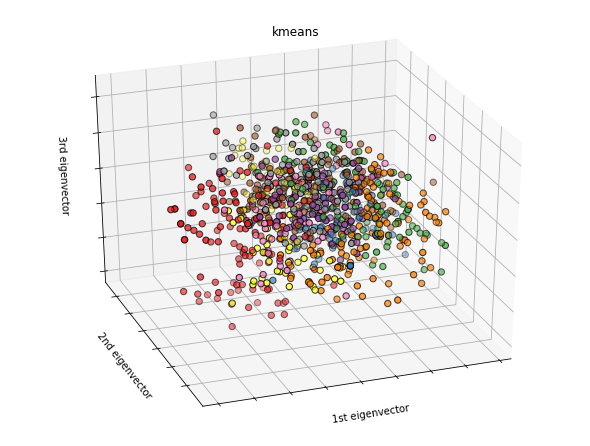

In [17]:
draw_PCA(X, all_categories_labels_kmeans, 'kmeans')

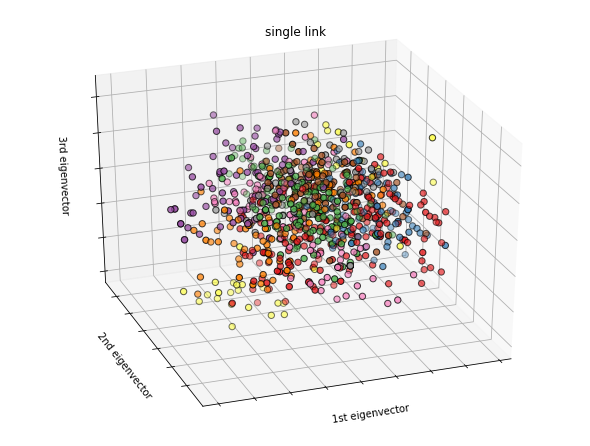

In [18]:
draw_PCA(X, all_categories_labels_single, 'single link')

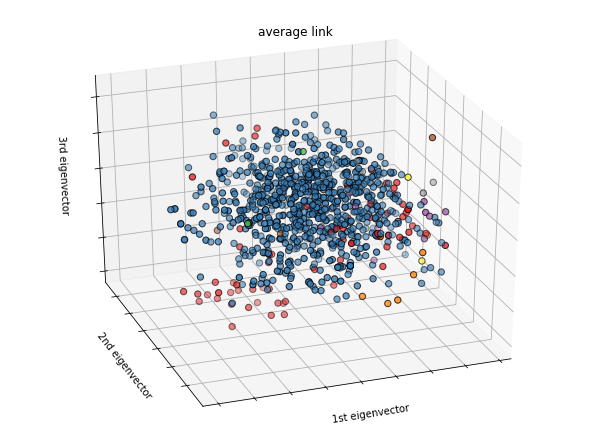

In [19]:
draw_PCA(X, all_categories_labels_average, 'average link')

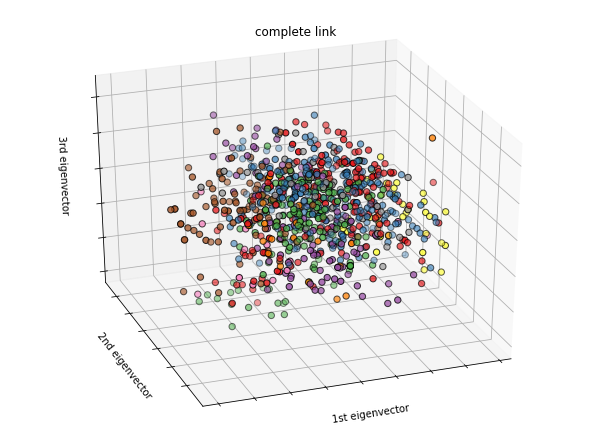

In [20]:
draw_PCA(X, all_categories_labels_complete, 'complete link')

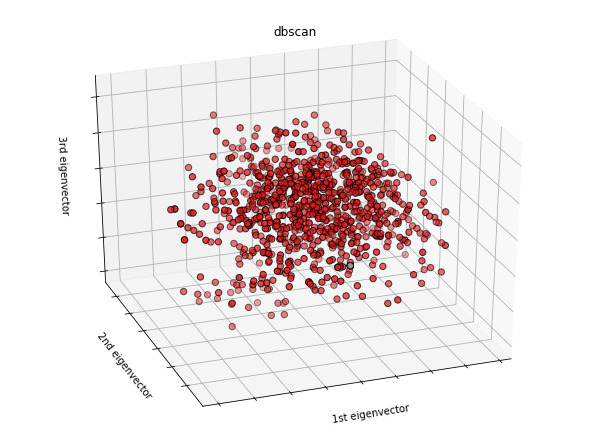

In [21]:
draw_PCA(X, all_categories_labels_dbscan, 'dbscan')

# Evaluation

In [22]:
df_cat = pd.DataFrame(all_categories_labels_kmeans, index=all_categories, columns=['label'])
for i in range(len(set(all_categories_labels_kmeans))):
    cats = list(df_cat[df_cat['label'] == i].index)    
    print("cluster " + str(i) + ": ")
    print(list(cats))
    print("=============================================")
    print("=============================================")


cluster 0: 
['Athletic Training', 'Golf', 'Golf Apparel', 'Track & Field', 'Boxing & MMA', 'Lacrosse', 'Hockey', 'Badminton', 'Bowl', 'Golf Balls', 'Varsity', 'Team Sports', 'Athletic', 'Volleyball', 'MLB', 'Gear', 'NBA', 'Games', 'Game', 'Basket', 'Football', 'Bowling', 'Pitcher', 'Tennis & Racquets', 'Cup', 'Outdoor Games', 'Baseball & Softball', 'Baseball', 'Sports Bras', 'Sports & Outdoor Play', 'Sport', 'Indoor', 'Athletic Apparel', 'Sports & Outdoors', 'Sports', "Women's Golf Clubs", 'Soccer', 'NHL', 'Fantasy', 'NFL', 'NCAA', 'Basketball', "Men's Golf Clubs", 'Polo, Rugby']
cluster 1: 
['Small Animal', 'Pets', 'Animals', 'Toddler', 'Animal', 'Art Doll', 'Kids', 'Human Figure Doll', 'Afghan', 'Doll Clothing', 'Women', "Women's Accessories", 'Finding', 'Pet Lover', 'Bags & Cases', 'Toys', 'Electronics for Kids', "Children's Books", "Kids' Bath", 'Other Accessories', 'Children', 'Baby & Toddler Toys', 'Stuffed Animals & Plush', 'Costume', 'Child Friendly', "Women's Handbags", 'Doll'

In [23]:
df_cat = pd.DataFrame(all_categories_labels_single, index=all_categories, columns=['label'])
for i in range(len(set(all_categories_labels_kmeans))):
    cats = list(df_cat[df_cat['label'] == i].index)    
    print("cluster " + str(i) + ": ")
    print(sorted(list(cats)))
    print("=============================================")
    print("=============================================")

cluster 0: 
['Athletic', 'Athletic Apparel', 'Athletic Training', 'Badminton', 'Ballet', 'Band & Orchestra', 'Basket', 'Bass Guitars', 'Bike & Skate', 'Board Shorts', 'Board, Surf', 'Bowling', 'Boxing & MMA', 'Brass Instruments', 'Cargo', 'Casual Pants', 'Casual Shorts', 'Coaster', 'Coasters', 'Cup', 'Drums & Percussion', 'Fishing', 'Formal', 'Gear', 'Golf', 'Golf Apparel', 'Golf Bags', 'Golf Balls', 'Golf Shoes', 'Guitars', 'Hiking & Camping', 'Indoor', 'Instrument', 'Leash', 'Maxi', "Men's Golf Clubs", 'Motorcycle', 'Motorcycle & Powersports', 'Musical instruments', 'Outdoor', 'Outdoor Games', 'Outdoors', 'Polo', 'Polo, Rugby', 'Poncho', 'Skateboard', 'Snowboard', 'Sports & Outdoor Play', 'Sports & Outdoors', 'Stringed Instruments', 'Swim Briefs', 'Swim Trunks', 'Tennis & Racquets', 'Track & Field', 'Training Pants', 'Tweezers', 'Water Sports', 'Wind & Woodwind Instruments', "Women's Golf Clubs", 'Yoga & Pilates']
cluster 1: 
['Afghan', 'Arts & Crafts', 'Bomber', 'Education & Teachin